# Airbnb NYC Linear regression

source: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

author: Elvira Dzhuraeva

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
nyc_airbnb_df = pd.read_csv('AB_NYC_2019.csv', index_col="id")
nyc_airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
nyc_airbnb_df.shape

(48895, 15)

In [4]:
nyc_airbnb_df.isnull().sum()
nyc_airbnb_df.isna().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
nyc_airbnb_df = nyc_airbnb_df[nyc_airbnb_df.price != 0]

In [6]:
nyc_airbnb_df.dropna(how='any', inplace=True )

In [7]:
duplicates = nyc_airbnb_df[nyc_airbnb_df.duplicated()]
duplicates

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,


In [8]:
nyc_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38811 entries, 2539 to 36455809
Data columns (total 15 columns):
name                              38811 non-null object
host_id                           38811 non-null int64
host_name                         38811 non-null object
neighbourhood_group               38811 non-null object
neighbourhood                     38811 non-null object
latitude                          38811 non-null float64
longitude                         38811 non-null float64
room_type                         38811 non-null object
price                             38811 non-null int64
minimum_nights                    38811 non-null int64
number_of_reviews                 38811 non-null int64
last_review                       38811 non-null object
reviews_per_month                 38811 non-null float64
calculated_host_listings_count    38811 non-null int64
availability_365                  38811 non-null int64
dtypes: float64(3), int64(6), object(6)
memory u

In [9]:
nyc_airbnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.881100e+04,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000
mean,6.424611e+07,40.728134,-73.951157,142.369199,5.868723,29.288088,1.373135,5.166757,114.881631
std,7.590371e+07,0.054992,0.046695,197.006883,17.390315,48.184653,1.680276,26.306326,129.535406
min,2.438000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,7.028184e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,1.018872e+08,40.762995,-73.935030,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
import math

def haversine(colms):
    R = 6372800  # Earth radius in meters
    center_lat, center_lon = 40.71813, -73.95677    # 40.7549, 73.9840 # Midtown Manhattan
    lat, lon = colms.latitude, colms.longitude
    
    phi1, phi2 = math.radians(center_lat), math.radians(lat) 
    dphi       = math.radians(lat - center_lat)
    dlambda    = math.radians(lon - center_lon)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

In [11]:
nyc_airbnb_df['distance_center'] = nyc_airbnb_df.apply(haversine, axis=1)

In [12]:
nyc_airbnb_df.drop(['name', 'host_id', 'host_name', 'last_review', 'neighbourhood', 'latitude', 'longitude'],axis=1, inplace=True)

In [13]:
nyc_airbnb_df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_center
id,,,,,,,,,
2539,Brooklyn,Private room,149,1,9,0.21,6,365,7966.444359
2595,Manhattan,Entire home/apt,225,1,45,0.38,2,355,4556.337024
3831,Brooklyn,Entire home/apt,89,1,270,4.64,1,194,3678.008653
5022,Manhattan,Entire home/apt,80,10,9,0.10,1,0,9004.976900
5099,Manhattan,Entire home/apt,200,3,74,0.59,1,129,3627.133653


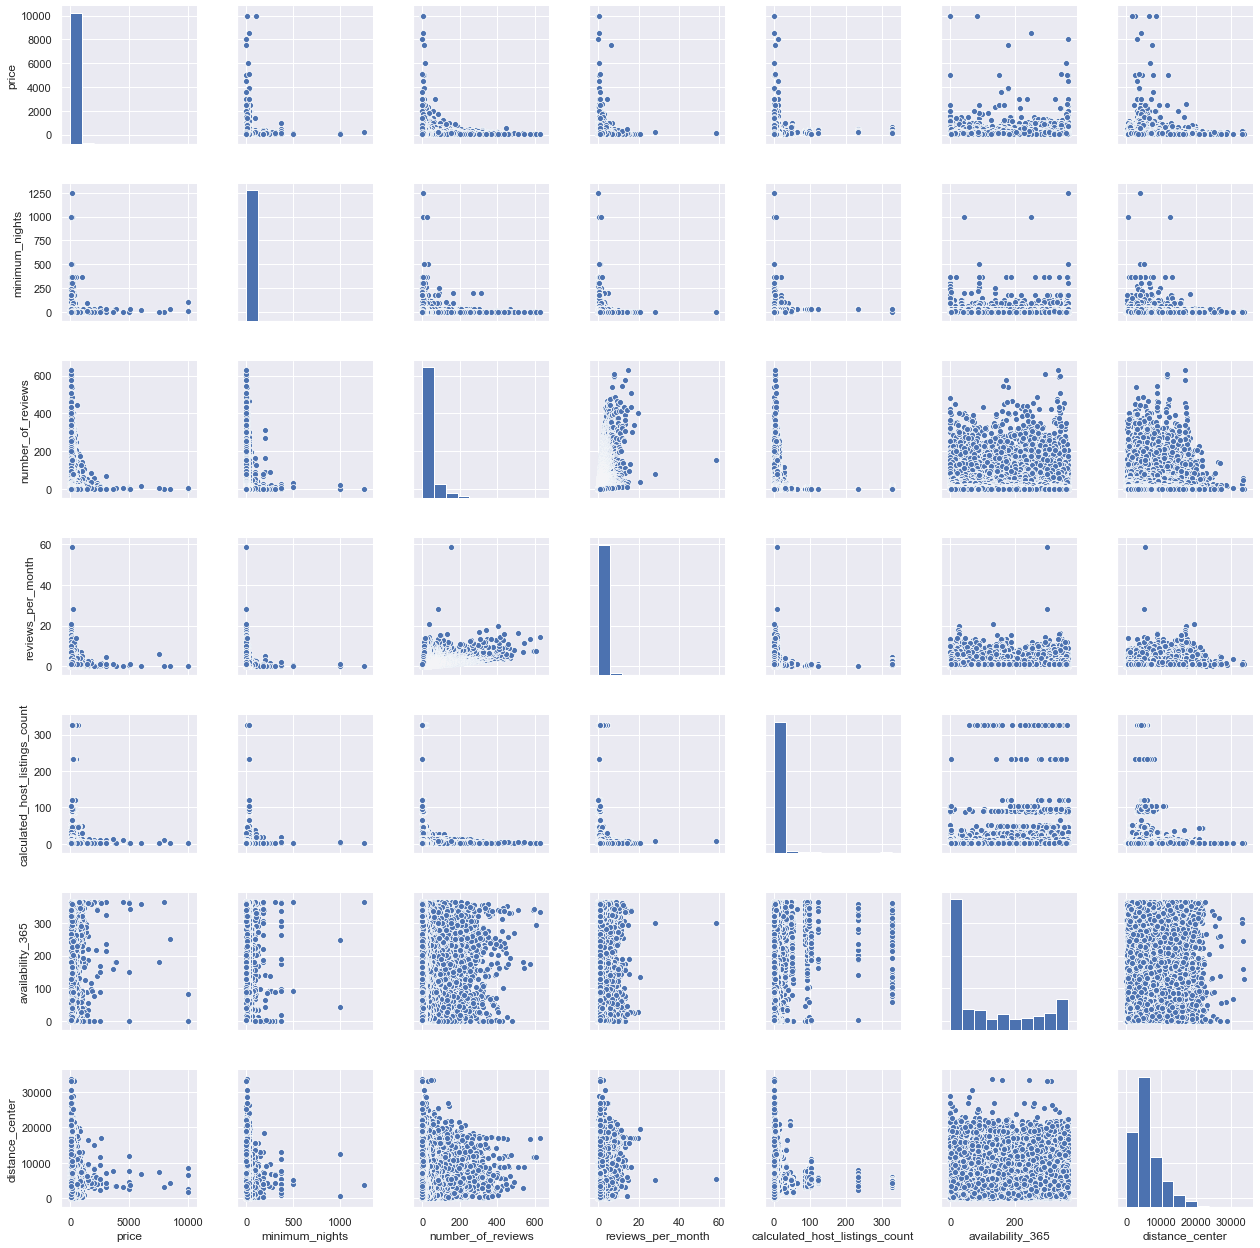

In [14]:
sns.pairplot(nyc_airbnb_df)

In [15]:
nyc_airbnb_df.groupby(['neighbourhood_group']).agg(['mean', 'count']).head()

price        minimum_nights         \
                           mean  count           mean  count   
neighbourhood_group                                            
Bronx                 79.649886    874       3.934783    874   
Brooklyn             121.529823  16430       5.318442  16430   
Manhattan            180.071596  16621       7.013477  16621   
Queens                95.783683   4572       4.222441   4572   
Staten Island         89.964968    314       3.420382    314   

                    number_of_reviews        reviews_per_month         \
                                 mean  count              mean  count   
neighbourhood_group                                                     
Bronx                       32.355835    874          1.837723    874   
Brooklyn                    29.571029  16430          1.283158  16430   
Manhattan                   27.322423  16621          1.271756  16621   
Queens                      34.318023   4572          1.941923   4572   
Staten Island               36.754777    314          1.872580    314   

                    calculated_host_listings_count        availability_365  \
                                              mean  count             mean   
neighbourhood_group                                                          
Bronx                                     2.203661    874       171.156751   
Brooklyn                                  2.232197  16430       105.832623   
Manhattan                                 8.774141  16621       109.340112   
Queens                                    3.355424   4572       150.554899   
Staten Island                             2.388535    314       205.640127   

                           distance_center         
                     count            mean  count  
neighbourhood_group                                
Bronx                  874    15909.172661    874  
Brooklyn             16430     4408.274269  16430  
Manhattan            16621     6401.177127  16621  
Queens                4572     8753.458991   4572  
Staten Island          314    17382.764071    314

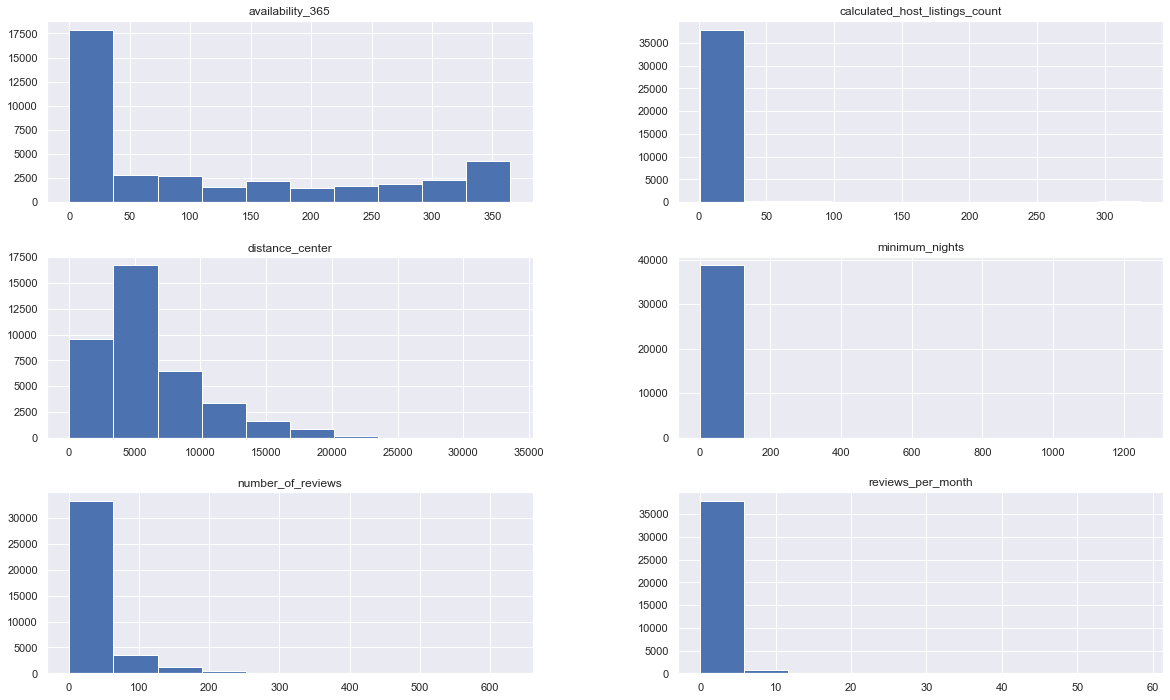

In [16]:
nyc_airbnb_df.drop('price',axis=1).hist(figsize=(20, 12));

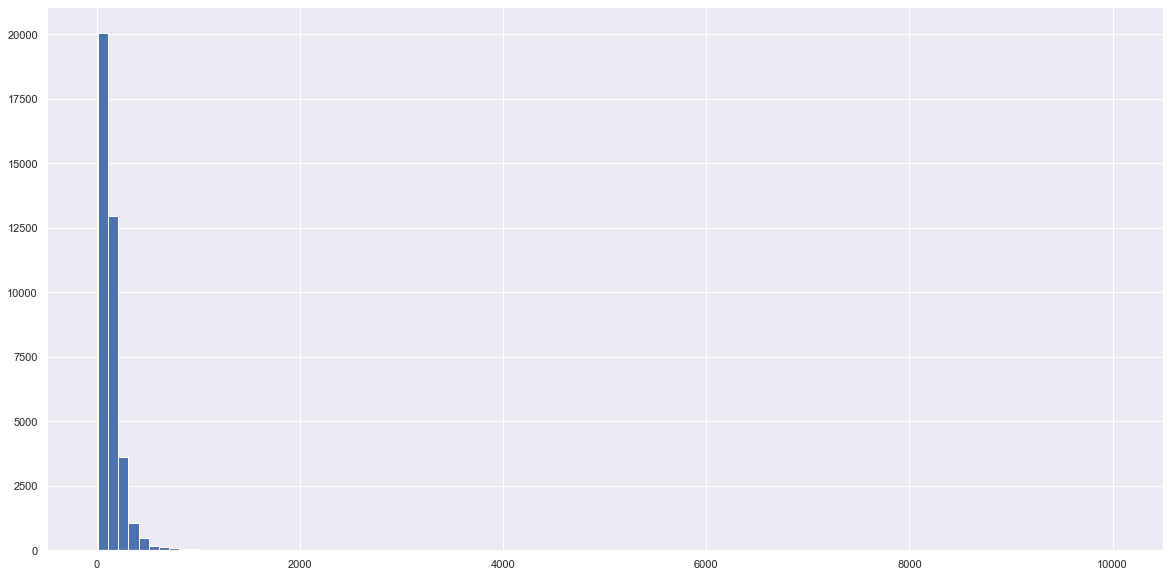

In [17]:
nyc_airbnb_df.price.hist(bins=100, figsize=(20,10));

In [18]:
nyc_airbnb_df['price'] = np.log(nyc_airbnb_df['price'])
nyc_airbnb_df['price'].head()

id
2539    5.003946
2595    5.416100
3831    4.488636
5022    4.382027
5099    5.298317
Name: price, dtype: float64

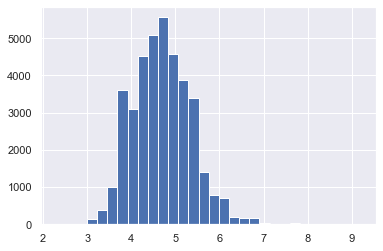

In [19]:
nyc_airbnb_df.price.hist(bins=30);

In [20]:
nyc_airbnb_df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_center
id,,,,,,,,,
2539,Brooklyn,Private room,5.003946,1,9,0.21,6,365,7966.444359
2595,Manhattan,Entire home/apt,5.416100,1,45,0.38,2,355,4556.337024
3831,Brooklyn,Entire home/apt,4.488636,1,270,4.64,1,194,3678.008653
5022,Manhattan,Entire home/apt,4.382027,10,9,0.10,1,0,9004.976900
5099,Manhattan,Entire home/apt,5.298317,3,74,0.59,1,129,3627.133653


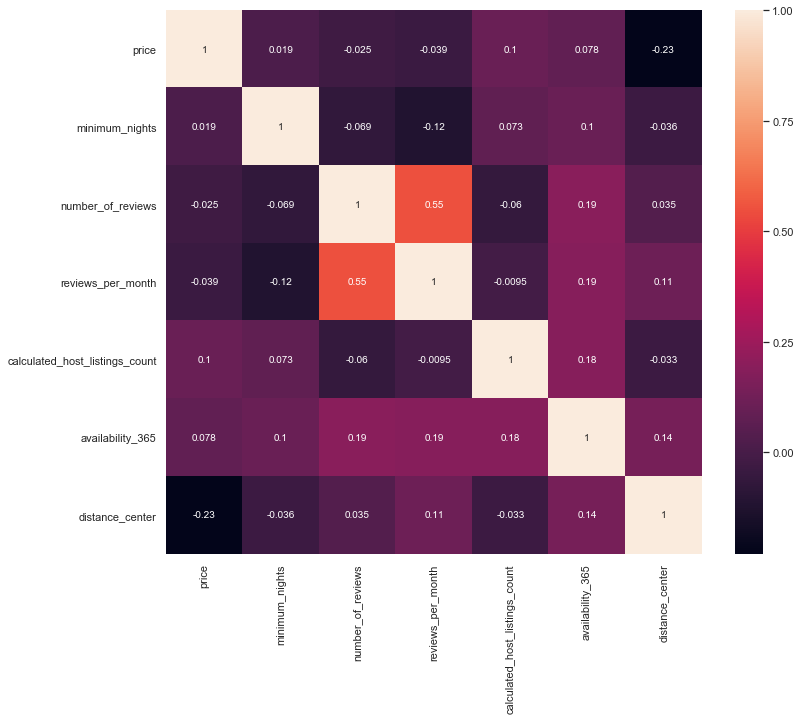

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(nyc_airbnb_df.corr(), annot=True);

In [22]:
df_categor = pd.get_dummies(nyc_airbnb_df['neighbourhood_group'], drop_first=True, prefix='code')

nyc_airbnb_df = pd.concat([nyc_airbnb_df.drop('neighbourhood_group',axis=1),df_categor], axis=1)
nyc_airbnb_df.head()

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_center,code_Brooklyn,code_Manhattan,code_Queens,code_Staten Island
id,,,,,,,,,,,,
2539,Private room,5.003946,1,9,0.21,6,365,7966.444359,1,0,0,0
2595,Entire home/apt,5.416100,1,45,0.38,2,355,4556.337024,0,1,0,0
3831,Entire home/apt,4.488636,1,270,4.64,1,194,3678.008653,1,0,0,0
5022,Entire home/apt,4.382027,10,9,0.10,1,0,9004.976900,0,1,0,0
5099,Entire home/apt,5.298317,3,74,0.59,1,129,3627.133653,0,1,0,0


In [23]:
df_categor = pd.get_dummies(nyc_airbnb_df['room_type'], drop_first=False, prefix='code')

nyc_airbnb_df = pd.concat([nyc_airbnb_df.drop('room_type',axis=1),df_categor], axis=1)
nyc_airbnb_df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_center,code_Brooklyn,code_Manhattan,code_Queens,code_Staten Island,code_Entire home/apt,code_Private room,code_Shared room
id,,,,,,,,,,,,,,
2539,5.003946,1,9,0.21,6,365,7966.444359,1,0,0,0,0,1,0
2595,5.416100,1,45,0.38,2,355,4556.337024,0,1,0,0,1,0,0
3831,4.488636,1,270,4.64,1,194,3678.008653,1,0,0,0,1,0,0
5022,4.382027,10,9,0.10,1,0,9004.976900,0,1,0,0,1,0,0
5099,5.298317,3,74,0.59,1,129,3627.133653,0,1,0,0,1,0,0


In [24]:
# Split dataset 
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(nyc_airbnb_df, test_size = 0.3)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continues_columns = ['distance_center','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
scaler.fit(df_train[continues_columns]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
df_train_scale = scaler.transform(df_train[continues_columns])

df_test_scale = scaler.transform(df_test[continues_columns])

In [27]:
df_train[continues_columns] = df_train_scale
df_test[continues_columns] = df_test_scale

/Users/edzhurae/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/edzhurae/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/edzhurae/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [28]:
df_train.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance_center,code_Brooklyn,code_Manhattan,code_Queens,code_Staten Island,code_Entire home/apt,code_Private room,code_Shared room
id,,,,,,,,,,,,,,
31956547,4.248495,-0.309948,-0.440051,0.696593,-0.158111,-0.302359,-0.268299,1,0,0,0,0,1,0
18895063,5.298317,-0.245386,-0.585741,-0.802780,-0.158111,-0.882256,0.168617,0,1,0,0,1,0,0
36060652,3.912023,-0.245386,-0.585741,-0.224708,-0.158111,-0.766276,-0.227141,1,0,0,0,0,1,0
34959442,3.912023,-0.309948,-0.585741,-0.224708,-0.158111,-0.255967,0.604802,0,1,0,0,0,0,1
30791783,5.293305,-0.245386,-0.585741,-0.573960,-0.158111,-0.495658,0.033405,0,1,0,0,1,0,0


In [29]:
print(df_train.shape)
print(df_test.shape)

(27167, 14)
(11644, 14)


In [30]:
y_train = df_train.price 
y_test = df_test.price 

X_train = df_train.drop('price', axis=1).get_values()
X_test = df_test.drop('price', axis=1).get_values()

# Metrics

In [31]:
from sklearn import metrics

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_metrics(y_test,y_pred, name):
    print('Method: ', name)
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', )
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

def get_metrics(y_test,y_pred, name):
    data = [{'MAE': metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)),
             'RMSE': np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))),
             'MAPE':mean_absolute_percentage_error(y_test, y_pred),
             'R2':  metrics.r2_score(y_test, y_pred) }] 
    return pd.DataFrame(data, index=[name], columns=["MAE", "RMSE","MAPE","R2"]) 

# Naive prediction

In [32]:
y_mean = np.mean(y_train)                     
y_pred_naive = np.ones(len(y_test)) * y_mean
y_pred_naive[:5]

array([4.6963058, 4.6963058, 4.6963058, 4.6963058, 4.6963058])

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

mr = LinearRegression()
mr.fit(X_train, y_train)
y_pred_regr = mr.predict(X_test)

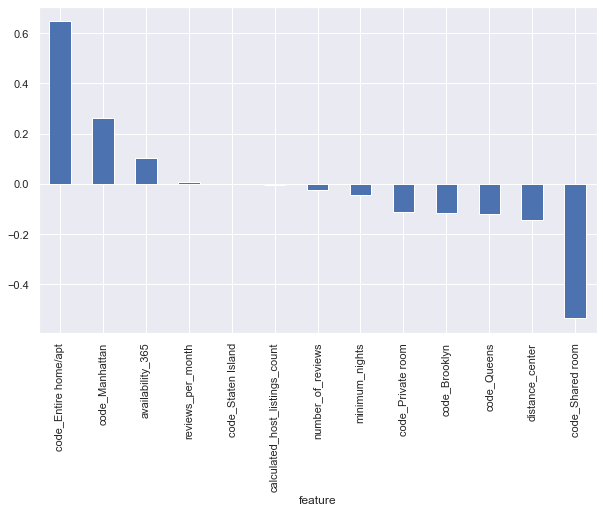

In [34]:
featureImportance = pd.DataFrame({"feature": nyc_airbnb_df.drop('price',axis=1).columns, 
                                  "importance": mr.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

# Lasso

In [35]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
print('best', lasso_cv.alpha_)

y_pred_lasso_cv = lasso_cv.predict(X_test)

best 0.00021028371213785294


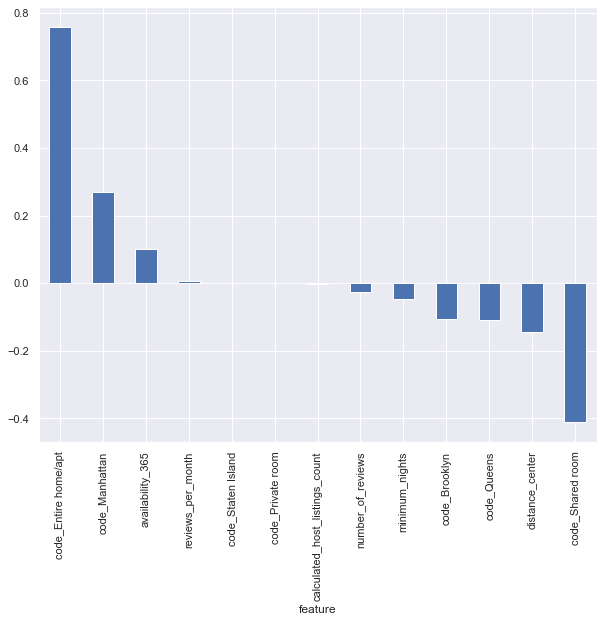

In [36]:
featureImportance = pd.DataFrame({"feature": nyc_airbnb_df.drop('price',axis=1).columns, 
                                  "importance": lasso_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 8));

# Ridge

In [37]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train, y_train)
print('best', ridge_cv.alpha_)

y_pred_ridge_cv = ridge_cv.predict(X_test)

best 1.0


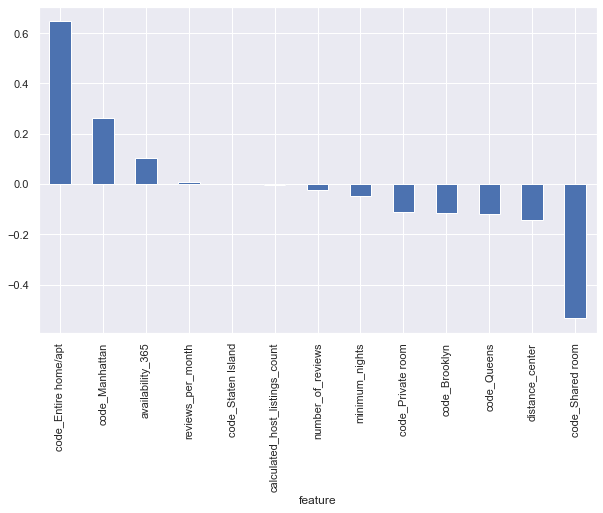

In [38]:
featureImportance = pd.DataFrame({"feature": nyc_airbnb_df.drop('price',axis=1).columns, 
                                  "importance": ridge_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

# Elastic Net

In [39]:
from sklearn.linear_model import ElasticNetCV

en_cv = ElasticNetCV(cv=5)
en_cv.fit(X_train, y_train)
print('best', en_cv.alpha_)

y_pred_en_cv = en_cv.predict(X_test)

best 0.00042056742427570593


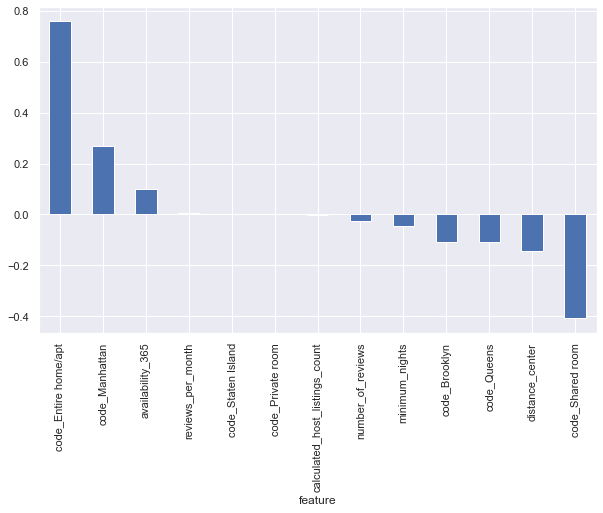

In [41]:
featureImportance = pd.DataFrame({"feature": nyc_airbnb_df.drop('price',axis=1).columns, 
                                  "importance": en_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

# Metrics comparison

In [ ]:
naive_metric = get_metrics(y_test, y_pred_naive, "Naive")
lr_metric = get_metrics(y_test,y_pred_regr, "Linear Regression")
lasso_metric = get_metrics(y_test,y_pred_lasso_cv, "Lasso")
ridge_metric = get_metrics(y_test,y_pred_ridge_cv, "Ridge")
en_metric = get_metrics(y_test,y_pred_en_cv, "Elastic Net")




In [ ]:
summary = pd.concat([naive_metric, lr_metric, lasso_metric, ridge_metric, en_metric]).sort_values(by=["RMSE"], ascending=True)
summary